<a href="https://colab.research.google.com/github/IngerMasha/week9/blob/main/day5/Mini_Project_Adv_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import plotnine as p9
import plotly.express as px

file_path = '/content/2016.csv'
data = pd.read_csv(file_path)
print(data.head())
print(data.isnull().sum())
data = data.dropna()
data.columns = ['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
                            'Lower_Confidence_Interval', 'Upper_Confidence_Interval',
                            'Economy_GDP_per_Capita', 'Family',
                            'Health_Life_Expectancy', 'Freedom',
                            'Trust_Government_Corruption', 'Generosity',
                            'Dystopia_Residual']

print(data.head())



       Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                

In [7]:
print(data.describe())
print(data['Happiness_Score'].value_counts())
print(data['Region'].unique())


       Happiness_Rank  Happiness_Score  Lower_Confidence_Interval  \
count      157.000000       157.000000                 157.000000   
mean        78.980892         5.382185                   5.282395   
std         45.466030         1.141674                   1.148043   
min          1.000000         2.905000                   2.732000   
25%         40.000000         4.404000                   4.327000   
50%         79.000000         5.314000                   5.237000   
75%        118.000000         6.269000                   6.154000   
max        157.000000         7.526000                   7.460000   

       Upper_Confidence_Interval  Economy_GDP_per_Capita      Family  \
count                 157.000000              157.000000  157.000000   
mean                    5.481975                0.953880    0.793621   
std                     1.136493                0.412595    0.266706   
min                     3.078000                0.000000    0.000000   
25%               

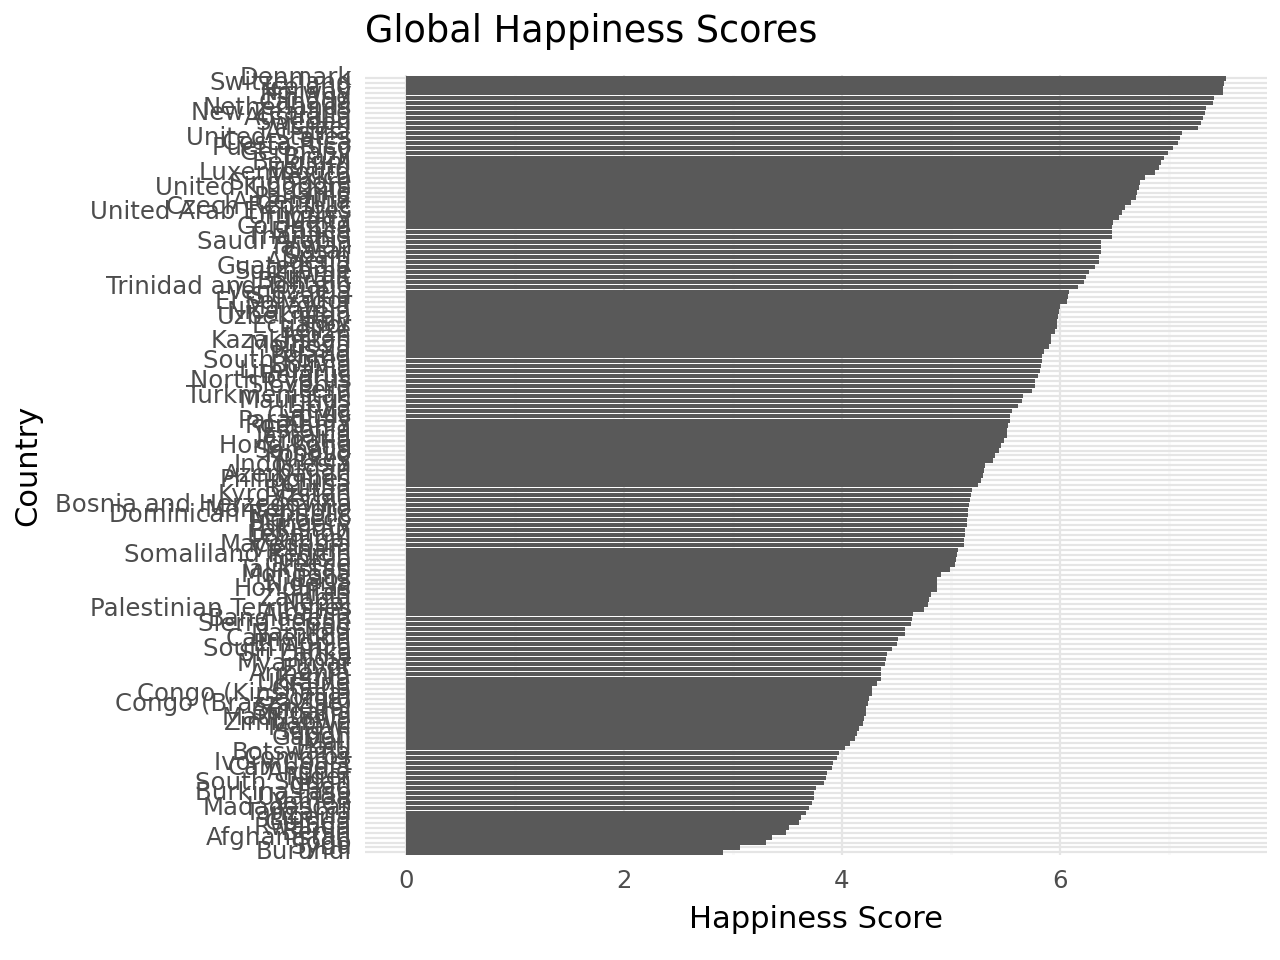

In [8]:
happiness_scores_plot = (
    p9.ggplot(data, p9.aes(x='reorder(Country, Happiness_Score)', y='Happiness_Score')) +
    p9.geom_bar(stat='identity') +
    p9.coord_flip() +
    p9.theme_minimal() +
    p9.labs(title='Global Happiness Scores', x='Country', y='Happiness Score')
)
print(happiness_scores_plot)


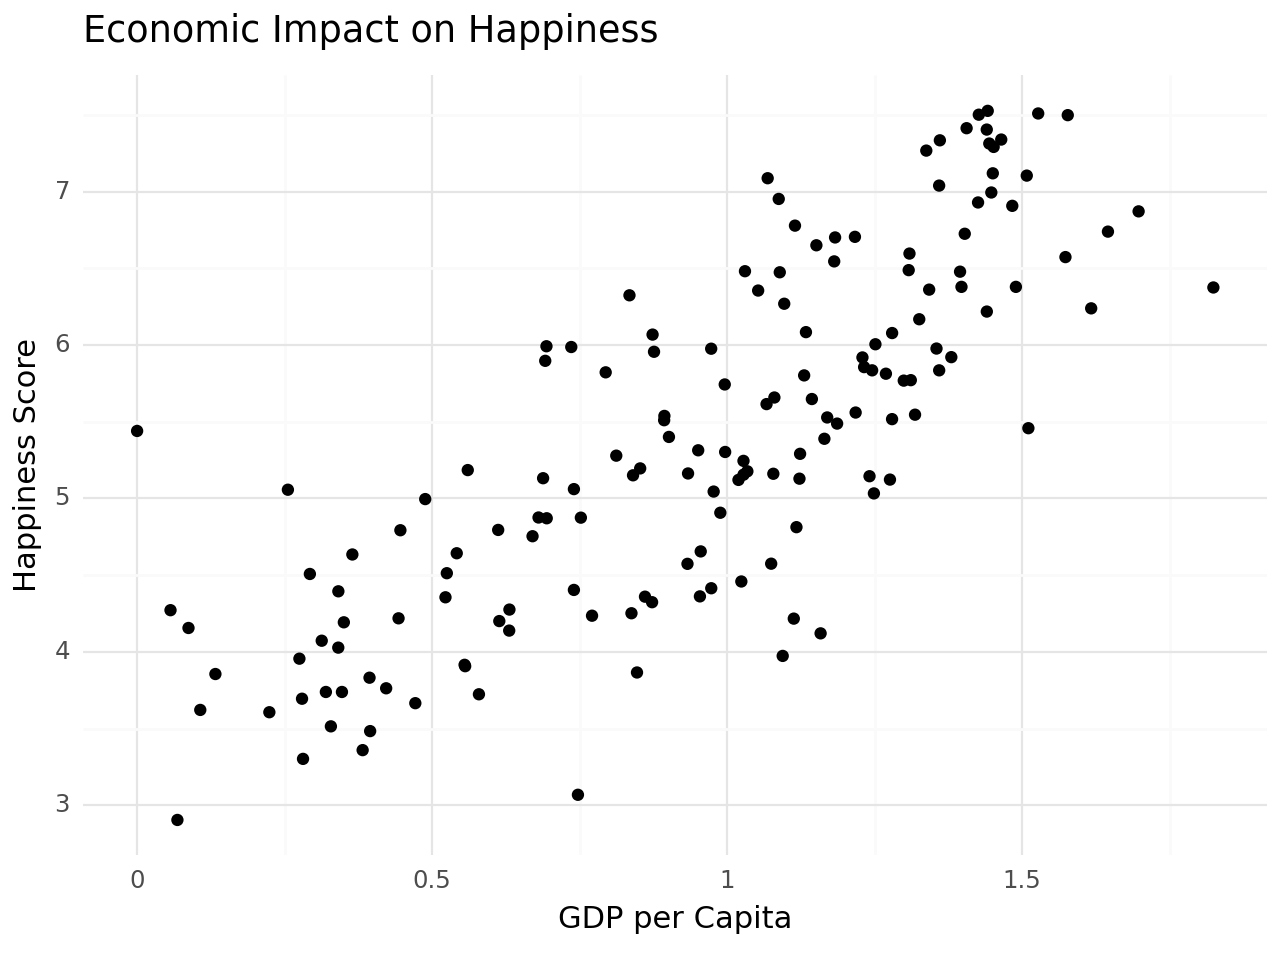

In [9]:
gdp_happiness_plot = (
    p9.ggplot(data, p9.aes(x='Economy_GDP_per_Capita', y='Happiness_Score')) +
    p9.geom_point() +
    p9.theme_minimal() +
    p9.labs(title='Economic Impact on Happiness', x='GDP per Capita', y='Happiness Score')
)
print(gdp_happiness_plot)


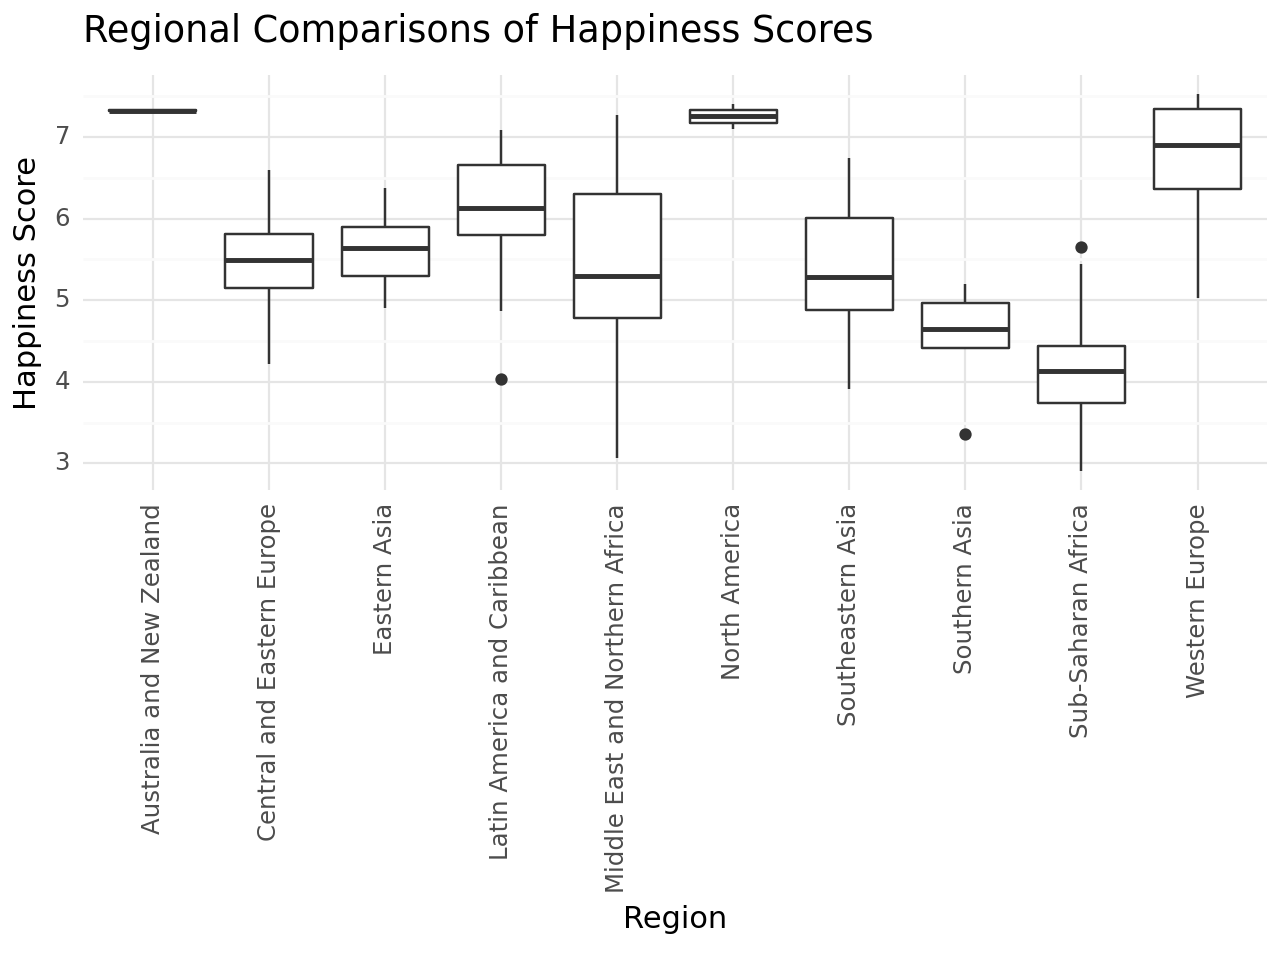

In [10]:
regional_comparison_plot = (
    p9.ggplot(data, p9.aes(x='Region', y='Happiness_Score')) +
    p9.geom_boxplot() +
    p9.theme_minimal() +
    p9.labs(title='Regional Comparisons of Happiness Scores', x='Region', y='Happiness Score') +
    p9.theme(axis_text_x=p9.element_text(rotation=90))
)
print(regional_comparison_plot)


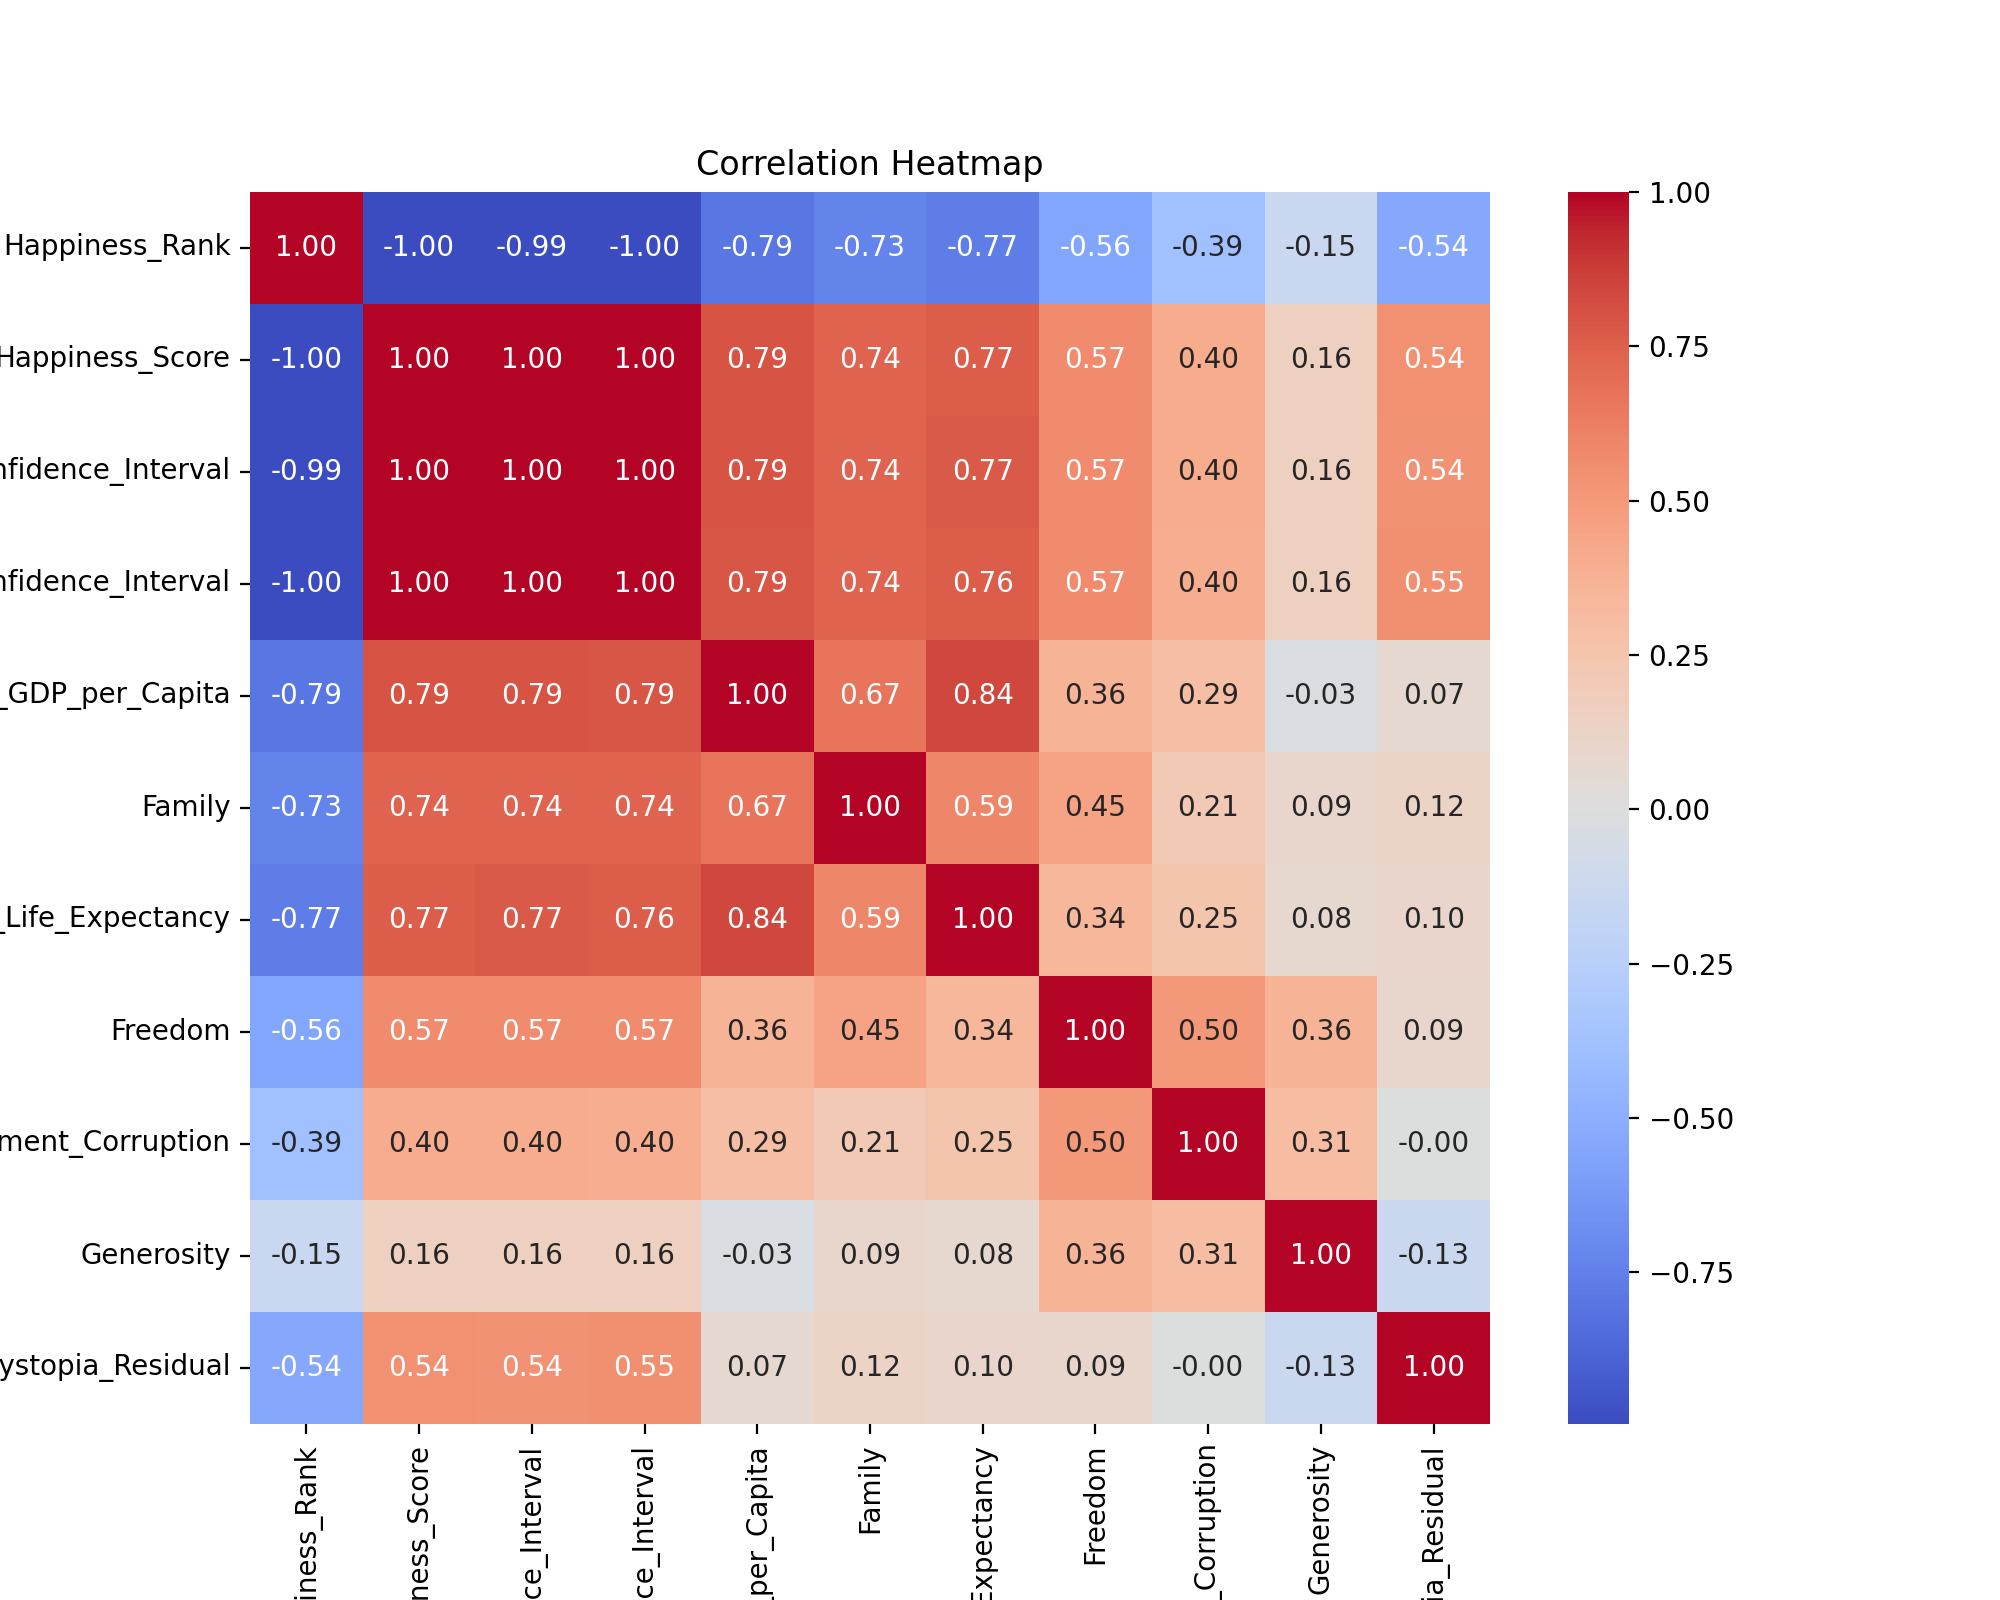

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
numerical_data = data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [14]:
world_map = px.choropleth(data,
                          locations="Country",
                          locationmode='country names',
                          color="Happiness_Score",
                          hover_name="Country",
                          title="Global Happiness Scores",
                          color_continuous_scale=px.colors.sequential.Plasma)
world_map.show()


In [15]:
scatter_plot = px.scatter(data,
                          x="Health_Life_Expectancy",
                          y="Happiness_Score",
                          color="Freedom",
                          size='Economy_GDP_per_Capita',
                          hover_name="Country",
                          title="Health vs Happiness with Freedom as Color",
                          labels={"Health_Life_Expectancy": "Life Expectancy", "Happiness_Score": "Happiness Score"})
scatter_plot.show()